In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers=2)

In [3]:
pf.session.load_data(name='hospital', src='file', fpath='data/hospital.csv')

INFO:profiler.utility:[0.007191181182861328] Load Data start

INFO:profiler.dataset:inferred types of attributes: {
    "ProviderNumber": "text",
    "HospitalName": "text",
    "Address1": "text",
    "Address2": "categorical",
    "Address3": "categorical",
    "City": "text",
    "State": "categorical",
    "ZipCode": "text",
    "CountyName": "text",
    "PhoneNumber": "text",
    "HospitalType": "text",
    "HospitalOwner": "text",
    "EmergencyService": "categorical",
    "Condition": "text",
    "MeasureCode": "text",
    "MeasureName": "text",
    "Score": "text",
    "Sample": "text",
    "Stateavg": "text"
}
INFO:profiler.dataset:(possible types: numeric, categorical, text)
INFO:profiler.utility:[0.07803916931152344] Load Data execution time: 0.07084798812866211



In [4]:
pf.session.ds.change_dtypes(['ProviderNumber', 'ZipCode', 'PhoneNumber', 'State'], 
                         ['categorical', 'numeric', 'categorical', 'text'])

INFO:profiler.dataset:updated types of ProviderNumber to 'categorical'
INFO:profiler.dataset:updated types of ZipCode to 'numeric'
INFO:profiler.dataset:updated types of PhoneNumber to 'categorical'
INFO:profiler.dataset:updated types of State to 'text'


In [5]:
# TODO save embedding vectors
# pf.session.load_embedding()

In [6]:
left, right = pf.session.trans_engine.create_pair_data(multiplier=pf.session.ds.df.shape[1])

In [7]:
s = pf.session.struct_engine

In [8]:
import pandas as pd
trans = pd.DataFrame(data = (left.values == right.values)*1, columns=left.columns)

In [9]:
def check_singular(data):
    # drop zero columns and rows
    drop_col = (data != 0).any(axis=0)
    data = data.loc[:, (data != 0).any(axis=0)]
    data = data.loc[(data != 0).any(axis=1), :]
    # check singular
    to_drop = []
    for col in data:
        if len(data[col].unique()) == 1:
            to_drop.append(col)
    if len(to_drop) != 0:
        data.drop(to_drop, axis=1, inplace=True)
    return data

In [10]:
trans = check_singular(trans)

In [11]:
s.run(trans, sparsity=0)

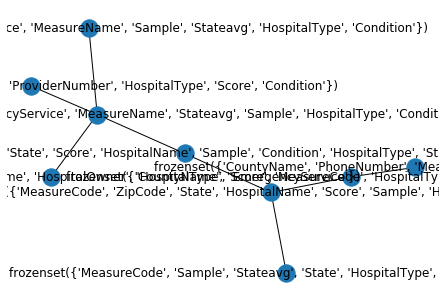

In [29]:
import matplotlib.pyplot as plt
import networkx as nx
nx.draw(s.G, with_labels=True)

In [28]:
vars(s)


{'env': {'db_user': 'profileruser',
  'db_pwd': 'abcd1234',
  'db_host': 'localhost',
  'db_name': 'profiler',
  'workers': 2,
  'null_policy': 'neq',
  'seed': 10,
  'verbose': False},
 'ds': <profiler.dataset.Dataset at 0x11b7b2160>,
 'param': {'sparsity': 0, 'solver': 'cd', 'max_iter': 300, 'zero': 0},
 'width': 8,
 'G': <networkx.classes.graph.Graph at 0x11b96f5f8>}

In [39]:
left = np.array([[1,2,3],[1,-1,2]])
right = np.array([[1,2,3],[2,-2,4]])

In [61]:
np.sum(left * right, axis=1) / (np.sqrt(np.sum(np.square(left), axis=1)) * np.sqrt(np.sum(np.square(right), axis=1)))

array([1., 1.])

In [60]:
np.sqrt(np.sum(np.square(left), axis=1)) * np.sqrt(np.sum(np.square(right), axis=1))

array([14., 12.])